 final_simplex: (array([[1.73165445e-05, 1.47746045e-05, 2.23937424e+00, 1.14941289e+01],
       [1.73164215e-05, 1.47747665e-05, 2.23936986e+00, 1.14942224e+01],
       [1.73165468e-05, 1.47746140e-05, 2.23937353e+00, 1.14941191e+01],
       [1.73165793e-05, 1.47745746e-05, 2.23937865e+00, 1.14941298e+01],
       [1.73165234e-05, 1.47746197e-05, 2.23937635e+00, 1.14940943e+01]]), array([1.09422804e-09, 1.09422804e-09, 1.09422804e-09, 1.09422804e-09,
       1.09422804e-09]))
           fun: 1.094228043024691e-09
       message: 'Optimization terminated successfully.'
          nfev: 160
           nit: 89
        status: 0
       success: True
             x: array([1.73165445e-05, 1.47746045e-05, 2.23937424e+00, 1.14941289e+01])
[[-4.55729167e-08  2.70000000e-05]
 [-4.55729167e-08  2.58260690e-05]
 [-4.55729167e-08  2.46521395e-05]
 [-4.55729167e-08  2.34782115e-05]
 [-4.55729167e-08  2.23042851e-05]
 [-4.55729167e-08  2.11303602e-05]
 [-4.55729167e-08  1.99564368e-05]
 [-4.55729167e-

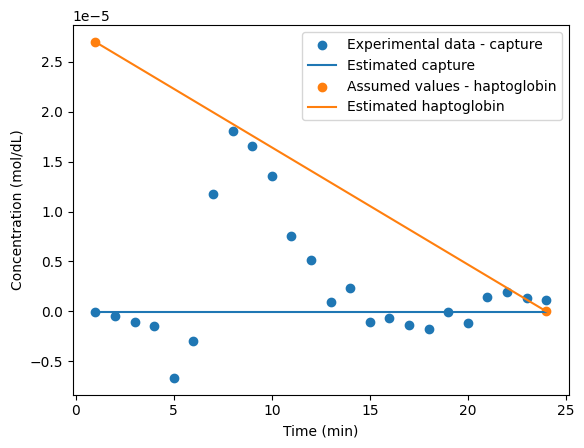

In [38]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.optimize import Bounds
from plotdf import plotdf

data = pd.read_excel('data.xlsx')
capture = data["cadj mol/dL"]-data["hpadj mol/dL"]

hbin = 2.7E-5
hpin = hbin
hpx = [1, 24]
hpy = [hpin, 0]

time = np.linspace(1, 24, 24)
ic = (capture[0], hpin)
ac = (1.38476998e-05, 1.38476998e-05, 6, 10)

def func(x, scap, sP, mucap, muP, t):
    dcapture =  -scap*t*np.exp(-(t-mucap)**2/2)/np.sqrt(2*3.1415)
    dP = - sP/((((x[1]-muP)**2)+1)**(3/2))
    return(dcapture, dP)

def err(params):
    scap, sP, mucap, muP = params
    ODEoutput = odeint(func, ic, time, args = (scap, sP, mucap, muP))
    errcapture = (ODEoutput[:,0] - capture)**2
    errP = (ODEoutput[0,1]-hpy[0])**2 + (ODEoutput[23, 1]-hpy[1])**2
    return (np.sum(errcapture) + np.sum(errP))

bounds = ([0, 1E100], [0, 1E100], [0, 1E100], [0, 1E100])
sol = minimize(err, x0 = ac, bounds = bounds, method = "Nelder-Mead")
print(sol)

fitdata = odeint(func, ic, data["time"], args=(sol.x[0], sol.x[1], sol.x[2], sol.x[3]))
print(fitdata)
plt.scatter(data["time"], capture, label = "Experimental data - capture")
plt.plot(data["time"], fitdata[:,0], label = "Estimated capture")
plt.scatter(hpx, hpy, label = "Assumed values - haptoglobin")
plt.plot(data["time"], fitdata[:,1], label = "Estimated haptoglobin")
plt.xlabel("Time (min)")
plt.ylabel("Concentration (mol/dL)")
plt.legend()